# Question 1 Homework 5 ADM

## Prelimiar activities 

In [1]:
import os
import pandas as pd
import numpy as np
import ijson
import time
from tqdm.notebook import tqdm
import csv
import json

In [2]:
os.chdir('C:\\Users\\Jacopo\\Downloads\\ADM\\Homework 5')
#file_path = 'dblp.v12.json'

primo metodo per leggere il dataset

In [ ]:
BATCH_SIZE = 10000  # Adjust the batch size as needed
TOTAL_PAPERS = 3000000  # Update with the total number of papers

# Initialize DataFrame columns
columns = ['id', 'num_authors', 'authors', 'n_citation', 'reference_count', 'references']
data_part1 = pd.DataFrame(columns=columns)
data_part2 = pd.DataFrame(columns=columns)

with open(file_path, "rb") as f:
    batch = []

    for i, element in tqdm(enumerate(ijson.items(f, "item")), desc="Processing Papers", unit=" papers", total=TOTAL_PAPERS):
        paper = {}
        paper['id'] = element['id']

        authors = element.get('authors')
        if authors:
            paper['num_authors'] = len(authors)
            paper['authors'] = [auth for auth in authors]

        n_citation = element.get('n_citation')
        paper['n_citation'] = n_citation if n_citation else 0

        references = element.get('references')
        paper['reference_count'] = len(references) if references else np.nan
        paper['references'] = references if references else np.nan

        batch.append(paper)

        if len(batch) == BATCH_SIZE:
            if i < TOTAL_PAPERS / 2:
                data_part1 = pd.concat([data_part1, pd.DataFrame(batch)], ignore_index=True)
            else:
                data_part2 = pd.concat([data_part2, pd.DataFrame(batch)], ignore_index=True)

            batch = []

    # Add the remaining papers in the last batch
    if i < TOTAL_PAPERS / 2:
        data_part1 = pd.concat([data_part1, pd.DataFrame(batch)], ignore_index=True)
    else:
        data_part2 = pd.concat([data_part2, pd.DataFrame(batch)], ignore_index=True)

# Save the intermediate DataFrames to CSV files
data_part1.to_csv("citations_dataset_part1.csv", index=False)
data_part2.to_csv("citations_dataset_part2.csv", index=False)

In [ ]:
# Load the intermediate datasets
data_part1 = pd.read_csv("citations_dataset_part1.csv")
data_part2 = pd.read_csv("citations_dataset_part2.csv")

# Merge the datasets
final_data = pd.concat([data_part1, data_part2], ignore_index=True)

# Save the final DataFrame to a CSV file
final_data.to_csv("citations_dataset_final.csv", index=False)

secondo metodo per leggere il dataset

In [ ]:
PAPERS = []
BATCH_SIZE = 100000  # Adjust the batch size as needed

with open(file_path, "rb") as f:
    batch = []
    
    # Wrap the loop with tqdm for a progress bar
    for i, element in tqdm(enumerate(ijson.items(f, "item")), desc="Processing Papers", unit=" papers"):
        paper = {}
        paper['id'] = element['id']

        authors = element.get('authors')
        if authors:
            paper['num_authors'] = len(authors)
            # joining all authors in a list
            paper['authors'] = [auth for auth in authors]

        n_citation = element.get('n_citation')
        paper['n_citation'] = n_citation if n_citation else 0

        references = element.get('references')
        paper['reference_count'] = len(references) if references else np.nan
        paper['references'] = references if references else np.nan

        batch.append(paper)

        if len(batch) == BATCH_SIZE:
            PAPERS.extend(batch)
            batch = []

    # Add the remaining papers in the last batch
    PAPERS.extend(batch)

da qui in poi codice valido per entrambi i metodi

In [3]:
dataset = pd.read_csv('citations_dataset_final.csv')
dataset

,id,num_authors,authors,n_citation,reference_count,references
0,1091,8.0,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",1,2.0,"[2005687710, 2018037215]"
1,1388,1.0,"[{'name': 'Pranava K. Jha', 'id': 2718958994}]",1,NaN,NaN
2,1674,2.0,"[{'name': 'G. Beale', 'org': 'Archaeological C...",1,15.0,"[1535888970, 1992876689, 1993710814, 203565334..."
3,1688,4.0,"[{'name': 'Altaf Hossain', 'org': 'Department ...",6,3.0,"[1560724230, 1986968751, 2156909104]"
4,5411,4.0,"[{'name': 'Rafael Álvarez', 'id': 2125293936},...",0,NaN,NaN
...,...,...,...,...,...,...
4894076,99905544,5.0,"[{'name': 'S. Nandagopalan', 'org': 'Dept. of ...",2,8.0,"[1562217771, 1625504505, 2015022770, 210875170..."
4894077,99884553,1.0,"[{'name': 'Koen Cornelis Hubertus Blom', 'org'...",0,NaN,NaN
4894078,999847014,11.0,"[{'name': 'Gert Læssøe Mikkelsen', 'org': 'Ale...",1,6.0,"[1940933138, 1975620021, 1978183200, 209759592..."
4894079,9990887,2.0,"[{'name': 'Rajesh Natarajan', 'org': 'Indian I...",0,NaN,NaN


In [4]:
column_to_drop_nan_values = 'references'
dataset = dataset.sort_values(by='n_citation', ascending=False)
dataset = dataset.dropna(subset=[column_to_drop_nan_values])
dataset_top_citation = dataset.head(10000)
dataset_top_citation = dataset_top_citation.reset_index(drop=True)
dataset_top_citation

,id,num_authors,authors,n_citation,reference_count,references
0,2151103935,1.0,"[{'name': 'David G. Lowe', 'org': 'Computer Sc...",35541,33.0,"[19720318, 1541642243, 1560959218, 1676552347,..."
1,2911964244,1.0,"[{'name': 'Leo Breiman', 'org': 'Statistics De...",34741,11.0,"[1507255258, 1580948147, 1605688901, 197584664..."
2,2153635508,2.0,"[{'name': 'Chih-Chung Chang', 'org': 'National...",31047,34.0,"[1510526001, 1543810117, 1556115774, 156879334..."
3,1791587663,1.0,"[{'name': 'Fred D. Davis', 'org': 'Computer an...",25855,22.0,"[157213131, 1520103841, 1778357938, 1972888601..."
4,2119821739,2.0,"[{'name': 'Corinna Cortes', 'org': 'AT&T Bell ...",22276,3.0,"[2087347434, 2154579312, 2168228682]"
...,...,...,...,...,...,...
9995,2124827397,3.0,"[{'name': 'Pawan Goyal', 'org': 'Distributed M...",551,27.0,"[1588883745, 1941732106, 1973544909, 199548424..."
9996,2120894402,4.0,"[{'name': 'Jessica K. Hodgins', 'org': 'Colleg...",551,22.0,"[1798187755, 1967934102, 1987574258, 198770668..."
9997,1982180670,2.0,"[{'name': 'Richard J. Lipton', 'id': 277112432...",551,12.0,"[1530008367, 1980572240, 2026191634, 203462313..."
9998,1559983024,1.0,"[{'name': 'Claudio S. Pinhanez', 'org': 'IBM T...",551,14.0,"[74179108, 137024741, 1987928129, 2007760386, ..."


## Citation graph

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import ast

In [5]:
dataset_top_citation_citation_graph = dataset_top_citation[['id','references']]
dataset_top_citation_citation_graph

,id,references
0,2151103935,"[19720318, 1541642243, 1560959218, 1676552347,..."
1,2911964244,"[1507255258, 1580948147, 1605688901, 197584664..."
2,2153635508,"[1510526001, 1543810117, 1556115774, 156879334..."
3,1791587663,"[157213131, 1520103841, 1778357938, 1972888601..."
4,2119821739,"[2087347434, 2154579312, 2168228682]"
...,...,...
9995,2124827397,"[1588883745, 1941732106, 1973544909, 199548424..."
9996,2120894402,"[1798187755, 1967934102, 1987574258, 198770668..."
9997,1982180670,"[1530008367, 1980572240, 2026191634, 203462313..."
9998,1559983024,"[74179108, 137024741, 1987928129, 2007760386, ..."


In [7]:
dataset_top_citation_citation_graph['references'] = dataset_top_citation_citation_graph['references'].apply(lambda x: x.replace('[', '').replace(']', '')).copy()
dataset_top_citation_citation_graph['references'] = dataset_top_citation_citation_graph['references'].apply(lambda x: x.split(','))
dataset_top_citation_citation_graph['id'] = dataset_top_citation_citation_graph['id'].astype(str)

C:\Users\Jacopo\AppData\Local\Temp\ipykernel_12128\365037131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top_citation_citation_graph['references'] = dataset_top_citation_citation_graph['references'].apply(lambda x: x.replace('[', '').replace(']', '')).copy()
C:\Users\Jacopo\AppData\Local\Temp\ipykernel_12128\365037131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top_citation_citation_graph['references'] = dataset_top_citation_citation_graph['references'].apply(lambda x: x.spli

In [8]:
all_ids = dataset_top_citation_citation_graph['id'].tolist()
all_ids = [id_.strip() for id_ in all_ids]
def references_under_id(ids_list):
    return [id_.strip() for id_ in ids_list if id_.strip() in all_ids]
dataset_top_citation_citation_graph['references_under_id'] = dataset_top_citation_citation_graph['references'].apply(references_under_id)
dataset_top_citation_citation_graph = dataset_top_citation_citation_graph.copy()
dataset_top_citation_citation_graph

C:\Users\Jacopo\AppData\Local\Temp\ipykernel_12128\3463937883.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top_citation_citation_graph['references_under_id'] = dataset_top_citation_citation_graph['references'].apply(references_under_id)


,id,references,references_under_id
0,2151103935,"[19720318, 1541642243, 1560959218, 16765523...","[1676552347, 1949116567, 2011891945, 202466829..."
1,2911964244,"[1507255258, 1580948147, 1605688901, 197584...","[1605688901, 1975846642, 2112076978, 211324281..."
2,2153635508,"[1510526001, 1543810117, 1556115774, 156879...","[1510526001, 1568793342, 1621799579, 205698353..."
3,1791587663,"[157213131, 1520103841, 1778357938, 1972888...","[1972888601, 1988410705, 2037021532, 209248890..."
4,2119821739,"[2087347434, 2154579312, 2168228682]","[2087347434, 2154579312]"
...,...,...,...
9995,2124827397,"[1588883745, 1941732106, 1973544909, 199548...","[2073440460, 2098289156, 2098375698, 209944078..."
9996,2120894402,"[1798187755, 1967934102, 1987574258, 198770...","[2117085697, 2127197749, 2150312211, 2293545866]"
9997,1982180670,"[1530008367, 1980572240, 2026191634, 203462...",[]
9998,1559983024,"[74179108, 137024741, 1987928129, 200776038...","[2140235142, 2149891956, 2158683916, 2237155658]"


In [9]:
G = nx.DiGraph()
G.add_nodes_from(dataset_top_citation_citation_graph['id'])
for _, row in dataset_top_citation_citation_graph.iterrows():
    source_node = row['id']
    target_node = row['references_under_id']
    G.add_edges_from([(source_node, target_node) for target_node in target_node])

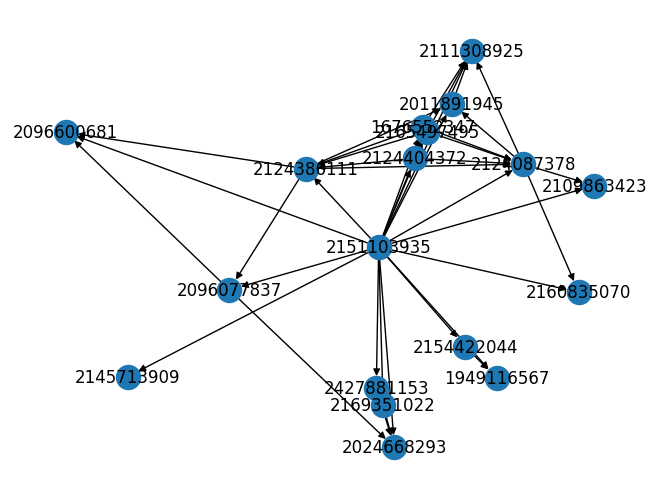

In [10]:
first_node_to_show = dataset_top_citation_citation_graph.iloc[0]
source_node = first_node_to_show['id']
target_node = first_node_to_show['references_under_id']
subgraph_nodes = [source_node] + target_node
subgraph = G.subgraph(subgraph_nodes)
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, arrowsize=10)
plt.show()

## Collaboration graph

In [5]:
import itertools

In [6]:
dataset_top_citation_collaboration_graph = dataset_top_citation[['authors']]
dataset_top_citation_collaboration_graph

,authors
0,"[{'name': 'David G. Lowe', 'org': 'Computer Sc..."
1,"[{'name': 'Leo Breiman', 'org': 'Statistics De..."
2,"[{'name': 'Chih-Chung Chang', 'org': 'National..."
3,"[{'name': 'Fred D. Davis', 'org': 'Computer an..."
4,"[{'name': 'Corinna Cortes', 'org': 'AT&T Bell ..."
...,...
9995,"[{'name': 'Pawan Goyal', 'org': 'Distributed M..."
9996,"[{'name': 'Jessica K. Hodgins', 'org': 'Colleg..."
9997,"[{'name': 'Richard J. Lipton', 'id': 277112432..."
9998,"[{'name': 'Claudio S. Pinhanez', 'org': 'IBM T..."


In [7]:
dataset_top_citation_collaboration_graph['authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda x: x.replace('[', '').replace(']', '')).copy()
dataset_top_citation_collaboration_graph['authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda x: x.replace('{', '').replace('}', '')).copy()
dataset_top_citation_collaboration_graph['authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda x: x.replace(':', '')).copy()
dataset_top_citation_collaboration_graph['authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda x: x.replace('David', '')).copy()
dataset_top_citation_collaboration_graph['authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda x: x.split(','))
dataset_top_citation_collaboration_graph['authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda authors: list(filter(lambda author: 'id' in author, authors)))
dataset_top_citation_collaboration_graph

C:\Users\Jacopo\AppData\Local\Temp\ipykernel_10468\3336505782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top_citation_collaboration_graph['authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda x: x.replace('[', '').replace(']', '')).copy()
C:\Users\Jacopo\AppData\Local\Temp\ipykernel_10468\3336505782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top_citation_collaboration_graph['authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda

,authors
0,[ 'id' 2104328312]
1,[ 'id' 2569376642]
2,"[ 'id' 2895256545, 'id' 2168176072]"
3,[ 'id' 2427477170]
4,"[ 'id' 2134830209, 'id' 2022407533]"
...,...
9995,"[ 'id' 2152918269, 'id' 2020627909, 'id' 266..."
9996,"[ 'id' 601642093, 'id' 1980379243, 'id' 2030..."
9997,"[ 'id' 2771124329, 'id' 350567680]"
9998,[ 'id' 320969846]


In [8]:
def clean_strings_authors(lst):
    cleaned_list = []
    for x in lst:
        ids_authors_only = ''.join(char for char in x if char.isdigit())
        if ids_authors_only:
            cleaned_list.append(int(ids_authors_only))
    return cleaned_list

dataset_top_citation_collaboration_graph['authors'] = dataset_top_citation_collaboration_graph['authors'].apply(clean_strings_authors)
dataset_top_citation_collaboration_graph

C:\Users\Jacopo\AppData\Local\Temp\ipykernel_10468\2892443498.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top_citation_collaboration_graph['authors'] = dataset_top_citation_collaboration_graph['authors'].apply(clean_strings_authors)


,authors
0,[2104328312]
1,[2569376642]
2,"[2895256545, 2168176072]"
3,[2427477170]
4,"[2134830209, 2022407533]"
...,...
9995,"[2152918269, 2020627909, 2662983009]"
9996,"[601642093, 1980379243, 2030310643, 2104748382]"
9997,"[2771124329, 350567680]"
9998,[320969846]


In [9]:
import networkx as nx
import itertools

G_collaboration = nx.Graph()

for _, row in dataset_top_citation_collaboration_graph.iterrows():
    author_list = row['authors']
    for collaboration in itertools.combinations(author_list, 2):
        if G_collaboration.has_edge(*collaboration):
            G_collaboration[collaboration[0]][collaboration[1]]['weight'] += 1
        else:
            G_collaboration.add_edge(*collaboration, weight=1)

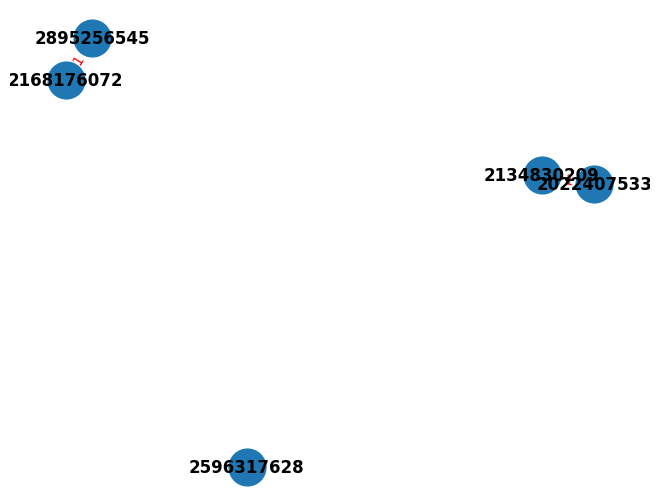

In [10]:
nodes_to_show = list(G_collaboration.nodes())[:5]
subgraph_collaboration = G_collaboration.subgraph(nodes_to_show)
pos = nx.spring_layout(subgraph_collaboration)
nx.draw(subgraph_collaboration, pos, with_labels=True, font_weight='bold', node_size=700)
edge_weights = {(i, j): subgraph_collaboration[i][j]['weight'] for i, j in subgraph_collaboration.edges()}
nx.draw_networkx_edges(subgraph_collaboration, pos, width=[subgraph_collaboration[i][j]['weight'] for i, j in subgraph_collaboration.edges()])
nx.draw_networkx_edge_labels(subgraph_collaboration, pos, edge_labels=edge_weights, font_color='red')

import matplotlib.pyplot as plt
plt.show()